In [110]:
import utilities as u
import gps.preproces_Covid_gps as ppC
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
dirPath = "C:\work\dev\dECMT_src\data_all\COVID19_Data\Current"
# ToDo:200621

In [112]:
fp= r"C:\work\dev\dECMT_src\data_all\COVID19_Data\Current\po2_fo2_data20-06-22_10-09-05.869361.csv"
df = pd.read_csv(fp)
df.describe()

,Unnamed: 0,pO2_FiO2,IS_PREGNANT,PATIENT_AGE,ICU_Days,Hospital_Days,C5,INVASIVE VENTILATION,ITU,NIV
count,10737.000000,10737.000000,10737.0,10737.000000,10737.000000,10737.000000,10737.000000,10737.0,10737.000000,10737.000000
mean,5368.000000,24.820374,0.0,57.230791,20.561423,19.672255,0.132532,0.0,0.997206,0.687063
std,3099.649254,105.423871,0.0,11.649813,20.425918,21.075121,0.339084,0.0,0.052788,0.463710
min,0.000000,2.176471,0.0,15.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,2684.000000,14.818182,0.0,51.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
50%,5368.000000,20.363636,0.0,60.000000,15.000000,18.000000,0.000000,0.0,1.000000,1.000000
75%,8052.000000,28.499997,0.0,65.000000,45.000000,32.000000,0.000000,0.0,1.000000,1.000000
max,10736.000000,6549.999500,0.0,84.000000,56.000000,66.000000,1.000000,0.0,1.000000,1.000000


In [113]:
list(df.columns)


['Unnamed: 0',
 'STUDY_ID',
 'RECORDED_DATETIME',
 'pO2_FiO2',
 'GENDER',
 'ETHNIC_GROUP',
 'IS_PREGNANT',
 'PATIENT_AGE',
 'ADM_DATETIME',
 'DISCHARGE_DATE',
 'hosp_start',
 'icu_start',
 'ICU_Days',
 'Hospital_Days',
 'C5',
 'INVASIVE VENTILATION',
 'ITU',
 'NIV',
 'ITU_date_start_date',
 'ITU_date_end_date',
 'NIV_date_start_date',
 'NIV_date_end_date',
 'C5_start_date',
 'C5_end_date']

In [114]:
df.head()

,Unnamed: 0,STUDY_ID,RECORDED_DATETIME,pO2_FiO2,GENDER,ETHNIC_GROUP,IS_PREGNANT,PATIENT_AGE,ADM_DATETIME,DISCHARGE_DATE,...,C5,INVASIVE VENTILATION,ITU,NIV,ITU_date_start_date,ITU_date_end_date,NIV_date_start_date,NIV_date_end_date,C5_start_date,C5_end_date
0,0,UHSCOVID_037e2bce,2020-04-14 15:40:00.000,32.066667,M,X,0,41,2020-04-14 15:14:00,2020-04-23 16:10:00,...,1,0,1,1,2020-04-14 21:00:00,2020-04-15 23:56:59,2020-04-16 01:59:00,2020-04-17 04:35:00,2020-04-15 23:57:00,2020-04-20 16:38:59
1,1,UHSCOVID_037e2bce,2020-04-14 16:29:00.000,2.176471,M,X,0,41,2020-04-14 15:14:00,2020-04-23 16:10:00,...,1,0,1,1,2020-04-14 21:00:00,2020-04-15 23:56:59,2020-04-16 01:59:00,2020-04-17 04:35:00,2020-04-15 23:57:00,2020-04-20 16:38:59
2,2,UHSCOVID_037e2bce,2020-04-14 22:32:00.000,25.666667,M,X,0,41,2020-04-14 15:14:00,2020-04-23 16:10:00,...,1,0,1,1,2020-04-14 21:00:00,2020-04-15 23:56:59,2020-04-16 01:59:00,2020-04-17 04:35:00,2020-04-15 23:57:00,2020-04-20 16:38:59
3,3,UHSCOVID_037e2bce,2020-04-14 23:03:00.000,27.599998,M,X,0,41,2020-04-14 15:14:00,2020-04-23 16:10:00,...,1,0,1,1,2020-04-14 21:00:00,2020-04-15 23:56:59,2020-04-16 01:59:00,2020-04-17 04:35:00,2020-04-15 23:57:00,2020-04-20 16:38:59
4,4,UHSCOVID_037e2bce,2020-04-15 00:04:00.000,34.750000,M,X,0,41,2020-04-14 15:14:00,2020-04-23 16:10:00,...,1,0,1,1,2020-04-14 21:00:00,2020-04-15 23:56:59,2020-04-16 01:59:00,2020-04-17 04:35:00,2020-04-15 23:57:00,2020-04-20 16:38:59


In [115]:
ids = df['STUDY_ID'].unique()
ids

array(['UHSCOVID_037e2bce', 'UHSCOVID_08d33993', 'UHSCOVID_09e14c3d',
       'UHSCOVID_0cd586ea', 'UHSCOVID_1277db7c', 'UHSCOVID_18acfd61',
       'UHSCOVID_18f343c9', 'UHSCOVID_19882a58', 'UHSCOVID_1fbd4777',
       'UHSCOVID_1fc3683b', 'UHSCOVID_264d09be', 'UHSCOVID_273f5dbf',
       'UHSCOVID_2c73b922', 'UHSCOVID_2c91e0eb', 'UHSCOVID_2e716c47',
       'UHSCOVID_316c0e1a', 'UHSCOVID_34072db2', 'UHSCOVID_36565ded',
       'UHSCOVID_38ff5206', 'UHSCOVID_396b46c4', 'UHSCOVID_3d4d1e97',
       'UHSCOVID_403db62e', 'UHSCOVID_4a960d27', 'UHSCOVID_4bb60a4c',
       'UHSCOVID_4eedbea5', 'UHSCOVID_51ccdc5a', 'UHSCOVID_55c0cdd3',
       'UHSCOVID_574066a4', 'UHSCOVID_59b3b756', 'UHSCOVID_5dfc8945',
       'UHSCOVID_61bc87c0', 'UHSCOVID_6d0785dc', 'UHSCOVID_6d78504e',
       'UHSCOVID_702d8fb6', 'UHSCOVID_72badc67', 'UHSCOVID_799def37',
       'UHSCOVID_7d001673', 'UHSCOVID_7e57acdc', 'UHSCOVID_7e5e06db',
       'UHSCOVID_7fb4d018', 'UHSCOVID_81a56f9b', 'UHSCOVID_82a1b278',
       'UHSCOVID_85f

In [116]:
#First id
id = ids[0]
id

'UHSCOVID_037e2bce'

# ICU


In [117]:
df['ICU_Present'] = df['ICU_Days']>0
df['Ventilation_Present'] = (df['NIV'] & df['INVASIVE VENTILATION'])

In [118]:
mapICUD0 = df['ICU_Days']<=0
mapICUDgt0 = df['ICU_Days']>0

dfICUD0 = df[mapICUD0]
dfICUDgt0  = df[mapICUDgt0]

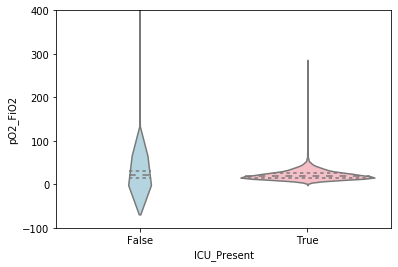

In [119]:
with sns.axes_style(style=None):
    sns.violinplot("ICU_Present", "pO2_FiO2",  data=df,
                  split=True, inner="quartile",
                  palette=["lightblue", "lightpink"]);
    axes = plt.gca()
    axes.set_ylim([-100,400])


(-150, 400)

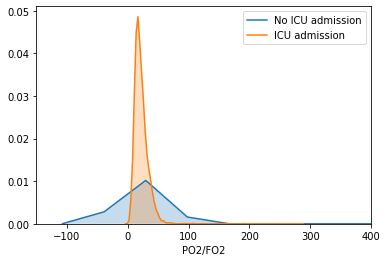

In [120]:
sns.kdeplot(dfICUD0.pO2_FiO2, label='No ICU admission', shade=True)
sns.kdeplot(dfICUDgt0.pO2_FiO2, label='ICU admission', shade=True)
plt.xlabel('PO2/FO2');
axes = plt.gca()
axes.set_xlim([-150,400])
# axes.set_ylim([ymin,ymax])

In [121]:
idsICUD0 = dfICUD0['STUDY_ID'].unique()
# idsICUD0


In [122]:
idsICUDgt0 = dfICUDgt0['STUDY_ID'].unique()
# idsICUDgt0


In [123]:
id_ICUDgt0 = idsICUDgt0[0]
id_ICUD0 = idsICUD0[0]


In [124]:
id_ICUDgt0


'UHSCOVID_037e2bce'

In [125]:
id_ICUD0


'UHSCOVID_0cd586ea'

In [126]:
dfICUD0_id0=dfICUD0[dfICUD0['STUDY_ID']==id_ICUD0]
dfICUD0_id0.head()

,Unnamed: 0,STUDY_ID,RECORDED_DATETIME,pO2_FiO2,GENDER,ETHNIC_GROUP,IS_PREGNANT,PATIENT_AGE,ADM_DATETIME,DISCHARGE_DATE,...,ITU,NIV,ITU_date_start_date,ITU_date_end_date,NIV_date_start_date,NIV_date_end_date,C5_start_date,C5_end_date,ICU_Present,Ventilation_Present
279,279,UHSCOVID_0cd586ea,2020-04-09 05:58:00.000,18.059998,M,A,0,60,2020-04-07 15:37:00,2020-05-01 12:44:00,...,1,1,2020-04-09 03:41:00,2020-04-12 16:49:59,2020-04-15 17:00:00,2020-04-28 05:13:00,2020-04-07 17:12:00,2020-04-09 03:40:59,False,0
280,280,UHSCOVID_0cd586ea,2020-04-09 08:46:00.000,15.820000,M,A,0,60,2020-04-07 15:37:00,2020-05-01 12:44:00,...,1,1,2020-04-09 03:41:00,2020-04-12 16:49:59,2020-04-15 17:00:00,2020-04-28 05:13:00,2020-04-07 17:12:00,2020-04-09 03:40:59,False,0
281,281,UHSCOVID_0cd586ea,2020-04-09 13:10:00.000,18.460000,M,A,0,60,2020-04-07 15:37:00,2020-05-01 12:44:00,...,1,1,2020-04-09 03:41:00,2020-04-12 16:49:59,2020-04-15 17:00:00,2020-04-28 05:13:00,2020-04-07 17:12:00,2020-04-09 03:40:59,False,0
282,282,UHSCOVID_0cd586ea,2020-04-09 13:12:00.000,8.020000,M,A,0,60,2020-04-07 15:37:00,2020-05-01 12:44:00,...,1,1,2020-04-09 03:41:00,2020-04-12 16:49:59,2020-04-15 17:00:00,2020-04-28 05:13:00,2020-04-07 17:12:00,2020-04-09 03:40:59,False,0
283,283,UHSCOVID_0cd586ea,2020-04-09 15:09:00.000,18.520000,M,A,0,60,2020-04-07 15:37:00,2020-05-01 12:44:00,...,1,1,2020-04-09 03:41:00,2020-04-12 16:49:59,2020-04-15 17:00:00,2020-04-28 05:13:00,2020-04-07 17:12:00,2020-04-09 03:40:59,False,0


In [127]:
list(dfICUD0_id0.columns)


['Unnamed: 0',
 'STUDY_ID',
 'RECORDED_DATETIME',
 'pO2_FiO2',
 'GENDER',
 'ETHNIC_GROUP',
 'IS_PREGNANT',
 'PATIENT_AGE',
 'ADM_DATETIME',
 'DISCHARGE_DATE',
 'hosp_start',
 'icu_start',
 'ICU_Days',
 'Hospital_Days',
 'C5',
 'INVASIVE VENTILATION',
 'ITU',
 'NIV',
 'ITU_date_start_date',
 'ITU_date_end_date',
 'NIV_date_start_date',
 'NIV_date_end_date',
 'C5_start_date',
 'C5_end_date',
 'ICU_Present',
 'Ventilation_Present']

In [128]:
dfICUDgt0_id0= dfICUDgt0[dfICUDgt0['STUDY_ID']==id_ICUDgt0]
dfICUDgt0_id0.head()


,Unnamed: 0,STUDY_ID,RECORDED_DATETIME,pO2_FiO2,GENDER,ETHNIC_GROUP,IS_PREGNANT,PATIENT_AGE,ADM_DATETIME,DISCHARGE_DATE,...,ITU,NIV,ITU_date_start_date,ITU_date_end_date,NIV_date_start_date,NIV_date_end_date,C5_start_date,C5_end_date,ICU_Present,Ventilation_Present
0,0,UHSCOVID_037e2bce,2020-04-14 15:40:00.000,32.066667,M,X,0,41,2020-04-14 15:14:00,2020-04-23 16:10:00,...,1,1,2020-04-14 21:00:00,2020-04-15 23:56:59,2020-04-16 01:59:00,2020-04-17 04:35:00,2020-04-15 23:57:00,2020-04-20 16:38:59,True,0
1,1,UHSCOVID_037e2bce,2020-04-14 16:29:00.000,2.176471,M,X,0,41,2020-04-14 15:14:00,2020-04-23 16:10:00,...,1,1,2020-04-14 21:00:00,2020-04-15 23:56:59,2020-04-16 01:59:00,2020-04-17 04:35:00,2020-04-15 23:57:00,2020-04-20 16:38:59,True,0
2,2,UHSCOVID_037e2bce,2020-04-14 22:32:00.000,25.666667,M,X,0,41,2020-04-14 15:14:00,2020-04-23 16:10:00,...,1,1,2020-04-14 21:00:00,2020-04-15 23:56:59,2020-04-16 01:59:00,2020-04-17 04:35:00,2020-04-15 23:57:00,2020-04-20 16:38:59,True,0
3,3,UHSCOVID_037e2bce,2020-04-14 23:03:00.000,27.599998,M,X,0,41,2020-04-14 15:14:00,2020-04-23 16:10:00,...,1,1,2020-04-14 21:00:00,2020-04-15 23:56:59,2020-04-16 01:59:00,2020-04-17 04:35:00,2020-04-15 23:57:00,2020-04-20 16:38:59,True,0
4,4,UHSCOVID_037e2bce,2020-04-15 00:04:00.000,34.750000,M,X,0,41,2020-04-14 15:14:00,2020-04-23 16:10:00,...,1,1,2020-04-14 21:00:00,2020-04-15 23:56:59,2020-04-16 01:59:00,2020-04-17 04:35:00,2020-04-15 23:57:00,2020-04-20 16:38:59,True,0


In [129]:
list(dfICUDgt0_id0.columns)


['Unnamed: 0',
 'STUDY_ID',
 'RECORDED_DATETIME',
 'pO2_FiO2',
 'GENDER',
 'ETHNIC_GROUP',
 'IS_PREGNANT',
 'PATIENT_AGE',
 'ADM_DATETIME',
 'DISCHARGE_DATE',
 'hosp_start',
 'icu_start',
 'ICU_Days',
 'Hospital_Days',
 'C5',
 'INVASIVE VENTILATION',
 'ITU',
 'NIV',
 'ITU_date_start_date',
 'ITU_date_end_date',
 'NIV_date_start_date',
 'NIV_date_end_date',
 'C5_start_date',
 'C5_end_date',
 'ICU_Present',
 'Ventilation_Present']

(0, 0.015)

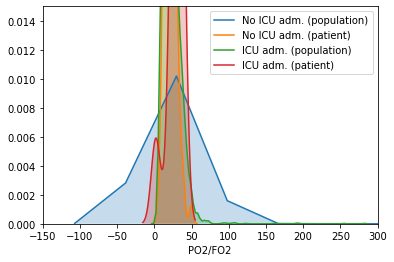

In [142]:
sns.kdeplot(dfICUD0.pO2_FiO2, label='No ICU adm. (population)', shade=True)
sns.kdeplot(dfICUD0_id0.pO2_FiO2, label='No ICU adm. (patient)', shade=True)
sns.kdeplot(dfICUDgt0.pO2_FiO2, label='ICU adm. (population)', shade=True)
sns.kdeplot(dfICUDgt0_id0.pO2_FiO2, label='ICU adm. (patient)', shade=True)
plt.xlabel('PO2/FO2');
axes = plt.gca()
axes.set_xlim([-150,300])
axes.set_ylim([0,0.015])


(0, 0.015)

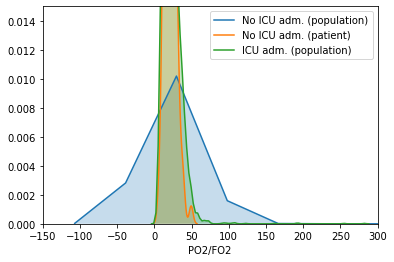

In [144]:
sns.kdeplot(dfICUD0.pO2_FiO2, label='No ICU adm. (population)', shade=True)
sns.kdeplot(dfICUD0_id0.pO2_FiO2, label='No ICU adm. (patient)', shade=True)
sns.kdeplot(dfICUDgt0.pO2_FiO2, label='ICU adm. (population)', shade=True)
# sns.kdeplot(dfICUDgt0_id0.pO2_FiO2, label='ICU adm. (patient)', shade=True)
plt.xlabel('PO2/FO2');
axes = plt.gca()
axes.set_xlim([-150,300])
axes.set_ylim([0,0.015])


(0, 0.05)

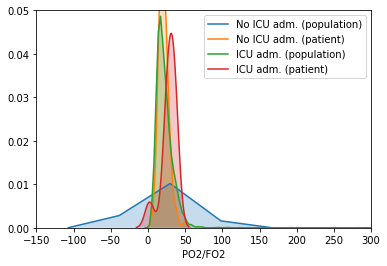

In [143]:
sns.kdeplot(dfICUD0.pO2_FiO2, label='No ICU adm. (population)', shade=True)
sns.kdeplot(dfICUD0_id0.pO2_FiO2, label='No ICU adm. (patient)', shade=True)
sns.kdeplot(dfICUDgt0.pO2_FiO2, label='ICU adm. (population)', shade=True)
sns.kdeplot(dfICUDgt0_id0.pO2_FiO2, label='ICU adm. (patient)', shade=True)
plt.xlabel('PO2/FO2');
axes = plt.gca()
axes.set_xlim([-150,300])
axes.set_ylim([0,0.05])


C:\Users\sutov\anaconda3\envs\dECMT\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\sutov\anaconda3\envs\dECMT\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(0, 0.02)

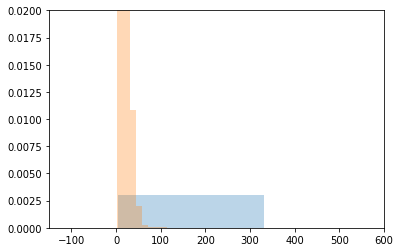

In [118]:
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=20)
plt.hist(dfICUD0.pO2_FiO2, **kwargs)
plt.hist(dfICUDgt0.pO2_FiO2, **kwargs)
axes = plt.gca()
axes.set_xlim([-150,600])
axes.set_ylim([0,0.02])

In [119]:
mapICUD0

0        False
1        False
2        False
3        False
4        False
         ...  
10732    False
10733    False
10734    False
10735    False
10736    False
Name: ICU_Days, Length: 10737, dtype: bool

In [120]:
mapICUDgt0

mapICUD0.describe()#%%




count     10737
unique        2
top       False
freq       7368
Name: ICU_Days, dtype: object

In [121]:
mapICUDgt0.describe()

count     10737
unique        2
top        True
freq       7368
Name: ICU_Days, dtype: object

# Invasive ventilation




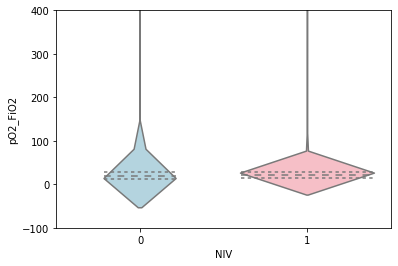

In [122]:
# df['Ventilation_Present'] = (df['NIV'] & df['INVASIVE VENTILATION'])

with sns.axes_style(style=None):
    sns.violinplot("NIV", "pO2_FiO2",  data=df,
                  split=True, inner="quartile",
                  palette=["lightblue", "lightpink"]);
    axes = plt.gca()
    axes.set_ylim([-100,400])

In [125]:
dfIVPresent = df[df['NIV']>0]
dfIVAbsent = df[df['NIV']==0]


(-150, 400)

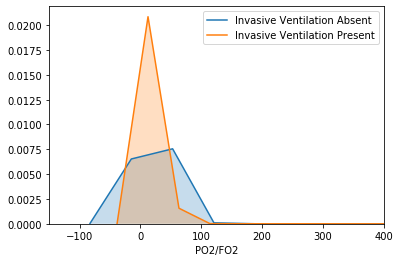

In [126]:
sns.kdeplot( dfIVAbsent.pO2_FiO2, label='Invasive Ventilation Absent', shade=True)
sns.kdeplot(dfIVPresent.pO2_FiO2, label='Invasive Ventilation Present', shade=True)
plt.xlabel('PO2/FO2');
axes = plt.gca()
axes.set_xlim([-150,400])
# axes.set_ylim([ymin,ymax])


